<a href="https://colab.research.google.com/github/vinay-pv/DA231o-Stock-Indicators/blob/main/vinaypv_pset2_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleanup and Exploratory Data Analysis
---


We will perform dataclean up and Exploratory data analysis using the glassdoor data for jobn postings related to datascience. 

### Instructions 
---

* All Your codes will be checked for plagiarism, any plagiarism will result in zero marks for both parties involved. 

* Only change the parts of the code, where it says `##TODO` and do not change any other parts of the code. 
* your evaluation will fail, if you modify the cells/ lines of code, where it says `DO NOT MODIFY`
* Do not hardcode any answers into the answer variables unlesss absolutely necessary. Always store a result of an operation from an expression into the answer variable. 
* hardcoding the answers will result in zero marks for the problem.




In [2]:
## DO NOT MODIFY
ANSWER_DICT = {}

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import matplotlib.pyplot as plt
from collections import Counter

### Loading Data
---


In [4]:
url='https://drive.google.com/file/d/1r0c9kOXrBU-R-AtJH0mPgjIvb1n3ZF2U/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Initial thoughts on Data
---

View the data using `df.head()` and `df.info()` and `df.describe()` and then answer the following questions

In [5]:
df.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


### Problem - 1 (IQR)
--- 

<br /> 
 What is the interquartile range(IQR) of the rating column ?

 Write the code which will obtain that value from output of `df.describe()` and store the final answer in `IQRVal` (For Eg : `IQRVal = your code here` ). 
 
 * Do not hardcode the final result into the ANSWER_DICT. 
 * While storing the value, please ensure proper steps are made such that the value is stored as a numerical value and not as str

In [6]:
## TO DO
## Enter
##_ANSWER_HASH_TAG_##

desc = df.describe()
col = "Rating"
Q3 = "75%"
Q1 = "25%"
IQRVal = desc.loc[Q3, col] - desc.loc[Q1, col]

##_ANSWER_HASH_TAG_##

ANSWER_DICT[1] = [IQRVal] ##--   Do not change

<br/>
<br/>
Now, while visualising the few rows of the dataframe, we could observe that there are lots of missing values which are represented by "-1". Now we plan to remove those missing values from our dataset
<br/>
<br/>

### Problem 2 
---

For this problem, remove the rows from dataframe based on the missing values only from the below columns 
`['Job Title','Salary Estimate','Rating','Size']`. 
Answer all the questions below, with respect to only these four columns.

Use pandas function to identify
* How many number of rows have no missing values 
(Datatype : int; store the answer at  `numRowsWithNoMissingValues` )

* What is the name of the second largest column with respect to number of missing values in a column (only among the columns mentioned on top). 
(Datatype : str ; store the answer at  `secondLargestColumnName`)

* Save the final dataframe after removing the missing values from these columns on to variable named `df_reduced` (This should have all columns fron original dataframe, but only the missing values removed from above mentioned columns)

Hint : you need to be aware of differnt datatypes the -1 values will occur in your dataframe. For Eg: -1,"-1" , "-1.0"  etc. replace all these values on the columns using replace to `np.nan` and then perform drop na. 




In [7]:
## TODO
##_ANSWER_HASH_TAG_##

df_reduced = df.copy()

reduced_cols = ['Job Title', 'Salary Estimate', 'Rating', 'Size']

df_red = df_reduced[reduced_cols].replace(["-1", "-1.0", -1], np.nan)
df_red_nan_sum = df_red.isna().sum()
df_red_nan_sorted = df_red_nan_sum.sort_values(ascending=False)

numRowsWithNoMissingValues = len(df_red.dropna())

secondLargestColumnName = df_red_nan_sorted.index[1]

df_reduced[reduced_cols] = df_reduced[reduced_cols].replace(['-1', '-1.0', -1], np.nan)
df_reduced = df_reduced.dropna(subset=reduced_cols)

##_ANSWER_HASH_TAG_##

ANSWER_DICT[2]  = [numRowsWithNoMissingValues,secondLargestColumnName,df_reduced] ## Do not change


---
#### Note : use `df_reduced` for all problems going forward
---

### Problem 3:
---

we could observe that the salary values are stored as range (For Eg: `$100K to $150K`).  Use **regular expressions** and capture groups within re to extract the necessary values


1.   Now create three new columns in our modified dataframe `df_reduced` to have these values. 

      * Min_Salary
      * Max_Salary
      * Mean_Salary

      So from this value `$100K to $150K`, the above three columns should have the values 100,150,125 respectively. (as numeric datatypes , without K and $ )
2.   Ensure the dtype of these columns is set as `float`

3.   Save the maximum  value of the `Max_Salary` column on to the variable `MaxSalaryinData`
4.    Save the min  value of the `Min_Salary` column on to the variable `MinSalaryinData`




In [8]:
## TODO

##_ANSWER_HASH_TAG_##

re = '\$([\d\.]+)K?\s*-\s*\$([\d\.]+)K?'
salary_range = df_reduced["Salary Estimate"].str.extract(re)

df_reduced["Min_Salary"] = salary_range[0].astype(float)
df_reduced["Max_Salary"] = salary_range[1].astype(float)


df_reduced["Mean_Salary"] = ((df_reduced["Min_Salary"] + df_reduced["Max_Salary"]) / 2).astype(float)


MaxSalaryinData = df_reduced["Max_Salary"].max()
MinSalaryinData = df_reduced["Min_Salary"].min()

##_ANSWER_HASH_TAG_##

ANSWER_DICT[3] = [MaxSalaryinData,MinSalaryinData,df_reduced["Min_Salary"].dtype]  ## Do not change

### Problem 4
---

lets clean up the Company Name column, to remove the rating which is attached to the end of company name and and answer the following questions. 

1. Remove the  `\n<some number>` attached to the end of each company name in `Company Name` column
2. Create a new column called `State_Code`, which extracts the two character state code from `Location` column
3. Identify the second third largest state code in terms of number of job postings (two char statecode name from `State_Code` column). Save this value onto the variable `thirdLargestStateCode` as a `str` dtype
4. Identify the name of the company with most postings in the `VA` State_Code with `Mean_Salary` greater than `150$`. Save the result onto the variable `largestCompanyVA` as a `int` dtype

5. What is the maximum number of postings from a single company in the `CA` region with Rating greater than `4` (save the result onto the variable `maxNumberCA` as `int` dtype)

Note: check if all the Values in `Location` has statecode ( a two charecter state code after ","). If there is no such value found in a row, then use the State_Code as same value as Location but in lowercase and with all additional spaces stripped off. For Eg: the statecode for "New York,NY" is "NY" and statecode for "Uttah" is "uttah"

In [9]:
## TODO

##_ANSWER_HASH_TAG_##



df_reduced["Company Name"] = df_reduced["Company Name"].str.replace(r'\n\d+.\d+', '', regex=True)
df_reduced["State_Code"]   = df_reduced["Location"].str.split(",").str[-1].str.strip()

thirdLargestStateCode = df_reduced["State_Code"].value_counts().index[2]
# print(thirdLargestStateCode)

cond = (df_reduced["State_Code"] == 'VA') & (df_reduced["Mean_Salary"] > 150)
va_companies = df_reduced.loc[cond].groupby("Company Name").size().sort_values(ascending=False)
largestCompanyVA = va_companies.index[0]
# print(largestCompanyVA)


cond = (df_reduced["State_Code"] == 'CA') & (df_reduced["Rating"] > 4)
ca_companies = df_reduced.loc[cond].groupby("Company Name").size()
maxNumberCA = ca_companies.max()
# print(maxNumberCA)

##_ANSWER_HASH_TAG_##

ANSWER_DICT[4] = [thirdLargestStateCode,largestCompanyVA,maxNumberCA] 

### Problem 5 
---

Lets get the number of people working at a specific company by taking those values from "Size" column and storing them on the column named `Max_Size`. Here we will only take the maximum values. For Eg: if company has 51 to 200 employees, we will put number of employees as 200. For special cases ( 10000+ employees --> 10000 , Unknown --> 0 ). The dtype of the `Max_Size` column should be `int`



1. How many number of companies, which are founded on or after 1990 has more than 9000 employees working with them. ( store the result  on `Over10kEmployees` as `int` dtype)

2. What is the glassdoor rating(`Rating`) of the startup company `CA` region which offers highest mean salary (. Consider a company founded on or after 2015 with `Max_Size` greater than 10 and less than 70 as a startup company. ( Store the value as `StartupMaxRating` with `float` as dtype)

In [10]:
## TODO

##_ANSWER_HASH_TAG_##

def extract_max_size(size):
    if size == 'Unknown':
        return 0
    elif '+' in size:
        return int(size.split('+')[0].replace(',', ''))
    else:
        sizes = size.split(' to ')
        return int(sizes[-1].split(' ')[0].replace(',', ''))

df_reduced["Max_Size"] = df_reduced["Size"].apply(extract_max_size)

max_size = 9000
founded = 1990
cond = (df_reduced["Max_Size"] > max_size) & (df_reduced["Founded"] >= founded)
Over10kEmployees = len(df_reduced[cond])


startup_max_size = 70
startup_min_size = 10
startup_founded  = 2015
startup_region = 'CA'
startup_cond = (df_reduced['Max_Size'] < startup_max_size) \
                & (df_reduced['Max_Size'] > startup_min_size) \
                & (df_reduced['State_Code'] == startup_region) \
                & (df_reduced['Founded'] >= startup_founded)
StartupMaxRating = df_reduced[startup_cond]["Rating"].max().astype(float)


##_ANSWER_HASH_TAG_##

ANSWER_DICT[5] = [Over10kEmployees,StartupMaxRating]


### Problem 6 
---

Lets extract all the skills from the job description. This is little bit challenging to extract. So lets have a list of commonnly mentioned skills and see how many of them were present as a required skill for each job posting 


1. Add a new column called `Skill`, which will contain the list of skills  present in the `Job Description` when compared with values from main `skillList`. Each row will have list of skills which are present in both the Description of the job and also in the `skillList`

For Example. if row has Job Description as ".. this job requires python c++ cuda sql and other additional skills .. As a python programmer you should be able to perform tasks such as ... ", then the `Skill` column of that row will have `[python, c++, sql]`.  **the skill list should contain only unique skill values, no duplicate should be found**


Hint: Replace special charecters in description ( so that can be split innto words) and convert the entire string into words. Compare those words agains words in `skillList` and then add the result to the `Skill` column

2. What is the maximum number of skills ( based on the computed list on `Skill` column ) that is that was requested for any job posting where `Job Title` is `Data Scientist`. Save it on variable named `maxLenSkill` as dtype `int`


In [11]:
skillList = ["python","sql","aws","spark","azure","r","tableau","java","excel","scala","hadoop","mlops","power bi","snowflake","kafka","nosql","docker","kubernetes","tensorflow","pytorch","pyspark","pandas","mysql","shell","linux","mongodb","pyspark","numpy","javascript","c++","pytorch","jira","jenkins","sap","scikit-learn","github","terraform","unix","c","matlab","go","kafka"]


In [12]:
## TODO

##_ANSWER_HASH_TAG_##

import re

pattern = re.compile(r'\b(?:{})\b'.format('|'.join(map(re.escape, skillList))), re.IGNORECASE)

def extract_skill(jd):
  skills = []
  jd = jd.lower()
  matches = pattern.findall(jd)
  matches = list(set(matches))
  return matches

df_reduced["Skill"] = df_reduced["Job Description"].apply(extract_skill)

df_reduced["LenSkill"] = df_reduced["Skill"].str.len()

maxLenSkill = df_reduced.loc[df_reduced["Job Title"] == "Data Scientist", "Skill"].apply(len).max()

##_ANSWER_HASH_TAG_##

ANSWER_DICT[6] = [maxLenSkill]

Create a new dataframe called `df_data_scientist`, which contains only rows with `Job Title` as `Data Scientist`

**For all further problems from now, use the dataframe `df_data_scientist`**

In [13]:
## TODO

df_data_scientist = df_reduced.loc[df_reduced["Job Title"] == "Data Scientist"].copy(deep=True)

### Problem 7
---

Lets perform some analysis on the given skill sets for the `Data Scientist` job using the `df_data_scientist` dataset.


1. Create a dictionary with all the skills as keys and their frequency as values. Sort them based on their values (i.e , the skill which has highext freqency should be the first key-value pair in the dictionary). Save the dictionary in the name `skillCounterSorted`

2. List the **5** most common skills that are requested for the role of `Data Scientist`. Save the result as a list in descending order of their frequency.(i.e, the most requested skill should be on first element of the list). Save the list in variable `topSkillsforDataScientist` as dtype `list`

3. Plot the top **10** skills and their frequency as a horizontal bar plot with proper label, title and grids. 



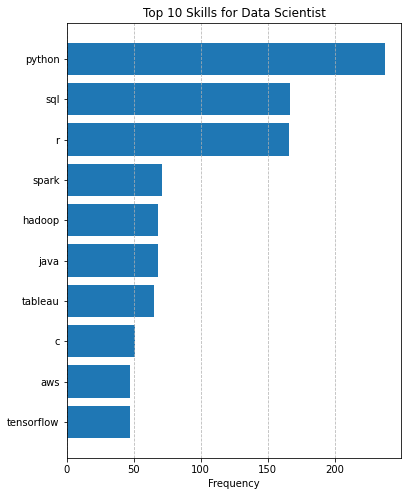

In [27]:
##TODO

##_ANSWER_HASH_TAG_##

# df_data_scientist["Skill"] =

## Sort the Dictionary 

all_skills = [skill for skills in df_data_scientist["Skill"] for skill in skills]

count_skills = Counter(all_skills)

skillCounterSorted = dict(sorted(count_skills.items(), key=lambda item: item[1], reverse=True))

topSkillsforDataScientist = list(skillCounterSorted.keys())[:5]

top_skills = list(skillCounterSorted.keys())[:10]
top_freq = list(skillCounterSorted.values())[:10]

## plot the figure 

fig,ax = plt.subplots(figsize=(6,8)) ## (DO NOT CHANGE)

ax.barh(top_skills, top_freq)
ax.invert_yaxis()  # Invert the y-axis so that the most common skill is at the top
ax.set_xlabel('Frequency')
ax.set_title('Top 10 Skills for Data Scientist')
ax.grid(axis='x', linestyle='--', alpha=0.9)

fig.savefig(f"top.png",dpi=200) ## (DO NOT CHANGE)

##_ANSWER_HASH_TAG_##



ANSWER_DICT[7] = [topSkillsforDataScientist,skillCounterSorted]

### Problem 8
---

For this problem, we will find how much of average salary you will get if you have a particular skill. To calculate it follow the below procedure
For Eg:

```
index    |  Skill                                        |   Mean_Salary      |
------------------------------------------------------------------------------
1        | ['python','sql']                              |     100            |
2        | ['tensorflow','python','pandas','sql']        |     200            |
3        | ['r','sql']                                   |     100            |

```

here the count dict will be
```
skillCounterSorted  = {
  sql: 3,
  python: 2,
  r: 1,
  tensorflow: 1,
  pandas: 1
}
```

lets make one more dict, which provides the related average payment for a skill. 

For Eg: take python, python appears on row 1 and row 2, So total Mean Salary is 100 + 200 = 300 divided by number of occurances (which is 2) , which gives final value of 150. For "sql", it appears on 3 rows, total mean_salary is 400, now dividing that by number of times it appeared (3), it becomes  133.33

here the count dict will be
```
skillSalarySorted  = {
  tensorflow: 200,
  pandas: 200,
  python: 150,
  sql: 133.33,
  r: 100
}
```



1. Store the final dictionary in the variable called `skillSalarySorted` in sorted order (i.e, the highest paid skill should be at top )

2. Plot a horizontal barplot for top 10 paid skills for `Data Scientist` role

3. What is the mean pay for the skill `tensorflow` (obtain the value from `skillSalarySorted` array ). Save the value in `tensorflowMeanPay`.

**Note, this is not the actual way to relate skill to payment. You could observe the imperfectness of this scheme, when you plot the top 5 skills**
AS far as this problem set goes, this 

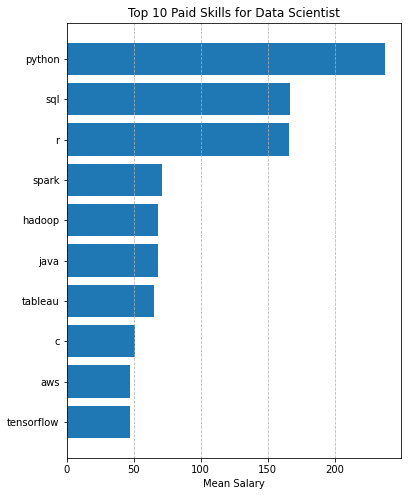

In [37]:
## TODO

##_ANSWER_HASH_TAG_##

df_exploded = df_data_scientist.explode('Skill')
skillSalary = df_exploded.groupby('Skill')['Mean_Salary'].mean()

skillSalarySorted = dict(sorted(count_skills.items(), key=lambda item: item[1], reverse=True))

tensorflowMeanPay = skillSalarySorted['tensorflow']

top_skills = list(skillSalarySorted.keys())[:10]
top_freq = list(skillSalarySorted.values())[:10]

fig,ax = plt.subplots(figsize=(6,8)) ## Do not change

ax.barh(top_skills, top_freq)
ax.invert_yaxis()  # Invert the y-axis so that the most common skill is at the top
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 Paid Skills for Data Scientist')
ax.grid(axis='x', linestyle='--', alpha=0.9)

fig.savefig("skill.png",dpi=150)
##_ANSWER_HASH_TAG_##

ANSWER_DICT[8] = [tensorflowMeanPay,skillSalarySorted]

### Problem 9:
---

In this section, we will observe general stats regarding the data present in `df_data_scientist` table. 

1. Store the mean salary offered at each state code and sort them (descending) based on the average of `Mean_Salary` value offered at all companies in a state.  Save the dataframe in `df_state` with columns `['State_Code' , 'Average_State_Salary']` where `State_Code` storing the state code and `Average_State_Salary` storing the average of `Mean_Salary` column in that state code. 


2. Store the second top `State_Code` and the `Average_State_Salary` as a tuple `(State_code,Average_State_salary)` in the variable named `secondTopStateCode`


3. Store the `Average_State_Salary` of the state `NY` in the variable called `NYAvgSalary`


4. Plot a horizontal bar plot of top 10 states with repect to the `Average_State_Salary`


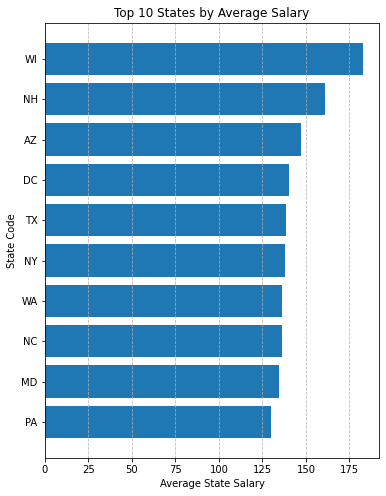

In [42]:
## TODO

##_ANSWER_HASH_TAG_##

df_state = df_data_scientist.groupby("State_Code")["Mean_Salary"].mean().reset_index()
df_state = df_state.rename(columns={"Mean_Salary": "Average_State_Salary"})
df_state = df_state.sort_values(by="Average_State_Salary", ascending=False)[["State_Code", "Average_State_Salary"]]

secondTopStateCode = tuple(df_state.iloc[1])

NYAvgSalary = df_state.loc[df_state["State_Code"] == "NY", "Average_State_Salary"].values[0]

top10_states = df_state.head(10)

fig,ax = plt.subplots(figsize=(6,8)) ## DO NOT CHANGE

ax.barh(top10_states["State_Code"], top10_states["Average_State_Salary"])
ax.invert_yaxis() 
ax.set_xlabel("Average State Salary")
ax.set_ylabel("State Code")
ax.set_title("Top 10 States by Average Salary")
ax.grid(axis='x', linestyle='--', alpha=0.9)

fig.savefig("topStates.png",dpi=200) ## Do not change

##_ANSWER_HASH_TAG_##

ANSWER_DICT[9] = [df_state,secondTopStateCode,NYAvgSalary]